# Apriori Algorithm


##  Apriori Algorithm

**Market Basket Analysis** is done by organizations so as to get itemsets that are frequent and regularly utilized together by customers. **Apriori algorithm** is a generally utilized system so as to discover those combinations of itemsets.


- It has got this odd name because it uses __‘prior’ knowledge of frequent itemset__ properties. The credit for introducing this algorithm goes to Rakesh Agrawal and Ramakrishnan Srikant in 1994.


- **Apriori algorithm** is a classical algorithm in data mining. It is used for __mining frequent itemsets and relevant association rules__. It is devised to operate on a database containing a lot of transactions, for instance, items brought by customers in a store.

<img src = "https://raw.githubusercontent.com/insaid2018/Term-4/master/images/download%20(5).png">

__Applications__
- It is very important for effective __Market Basket Analysis__ and it helps the customers in purchasing their items with more ease which increases the sales of the markets. 


- This also has utility in the field of healthcare as it can help in detecting __adverse drug reactions__ (ADR) by producing association rules to indicate the combination of medications and patient characteristics that could lead to ADRs.

__Market Basket Analysis__ is one of the key techniques used by large retailers to uncover __associations__ between items. It works by looking for combinations of items that occur together __frequently__ in transactions. To put it in another way, it allows retailers to identify __relationships__ between the items that people buy.<br/>


__Association Rules (Antecedent and Consequent)__

Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. It identifies frequent __if-then associations__ called association rules which consists of an __antecedent (if)__ and a __consequent (then)__
Association Rules is one of the very important concepts of machine learning being used in market basket analysis. 
Lets now see what an association rule exactly looks like. It consists of an __antecedent (if)__ and a __consequent(then)__, both of which are a list of items. 

For example: “__If tea and milk, then sugar__” (“If tea and milk are purchased, then sugar would also be bought by the customer”)

- Antecedent: Tea and Milk

- Consequent: Sugar.


What is Association Rule Learning?
--

Association Rule Learning is rule-based learning for identifying the association between different variables in a database. **`One of the best and most popular examples of Association Rule Learning is the Market Basket Analysis`**. The problem analyses the association between various items that has the highest probability of being bought together by a customer.

For example, the association rule, {onions, chicken masala} => {chicken} says that a person who has got both onions and chicken masala in his or her basket has a high probability of buying chicken also.


Apriori Algorithm
--

The algorithm was first proposed in 1994 by Rakesh Agrawal and Ramakrishnan Srikant. Apriori algorithm finds the most frequent itemsets or elements in a transaction database and identifies association rules between the items just like the above-mentioned example.


How Apriori works ?
--

To construct association rules between elements or items, the algorithm considers 3 important factors which are, support, confidence and lift. Each of these factors is explained as follows:

**Support:**

The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions expressed as :

<img src="https://miro.medium.com/max/403/0*pyOADkeaWyrVP2ft.png" />

<font color='darkgreen'><b>Support</b></font> indicates how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. In Table 1 below, the support of {apple} is 4 out of 8, or 50%. Itemsets can also contain multiple items. For instance, the support of {apple, beer, rice} is 2 out of 8, or 25%.

<img src='https://annalyzin.files.wordpress.com/2016/04/association-rule-support-table.png?w=503&h=447' />

<br />

<font color='red'><em>If you discover that sales of items beyond a certain proportion tend to have a significant impact on your profits, you might consider using that proportion as your support threshold. You may then identify itemsets with support values above this threshold as significant itemsets.</em></font>


**Confidence:**

This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2,  in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1. ( Assume I1 as X , I2 as Y )

<img src='https://miro.medium.com/max/576/1*50GI4dR58MnhwBP9dw6nFQ.png' />

<font color='darkgreen'><b>Confidence</b></font> says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.

<img src='https://annalyzin.files.wordpress.com/2016/03/association-rule-confidence-eqn.png?w=527&h=77' />

<font color='red'><em>One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. To account for the base popularity of both constituent items, we use a third measure called lift. </em></font>


**Lift:**

Lift is the ratio between the confidence and support.

<font color='darkgreen'><b>Lift</b></font> says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought. ( *here X represents apple and Y represents beer* )

<img src='https://annalyzin.files.wordpress.com/2016/03/association-rule-lift-eqn.png?w=566&h=80' />

<hr>



## importing Libraries

In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/amity1415/eKeeda/main/Rawdata/BreadBasket_DMS.csv")

In [3]:
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [4]:
data.shape

(21293, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [6]:
data.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [7]:
data.describe(include='all')

,Date,Time,Transaction,Item
count,21293,21293,21293.000000,21293
unique,159,8240,NaN,95
top,2017-02-04,12:07:39,NaN,Coffee
freq,302,16,NaN,5471
mean,NaN,NaN,4951.990889,NaN
std,NaN,NaN,2787.758400,NaN
min,NaN,NaN,1.000000,NaN
25%,NaN,NaN,2548.000000,NaN
50%,NaN,NaN,5067.000000,NaN
75%,NaN,NaN,7329.000000,NaN


In [8]:
# making the values of items in lowercase
data['Item']=data['Item'].str.lower()

In [9]:
pd.set_option('display.max_rows',100)
data.Item.value_counts()

coffee                           5471
bread                            3325
tea                              1435
cake                             1025
pastry                            856
none                              786
sandwich                          771
medialuna                         616
hot chocolate                     590
cookies                           540
brownie                           379
farm house                        374
muffin                            370
juice                             369
alfajores                         369
soup                              342
scone                             327
toast                             318
scandinavian                      277
truffles                          193
coke                              185
spanish brunch                    172
fudge                             159
baguette                          152
jam                               149
tiffin                            146
mineral wate

In [10]:
#Since there are 786 none values in item, lets drop those
data=data.drop(data[data.Item=='none'].index)

In [11]:
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,bread
1,2016-10-30,10:05:34,2,scandinavian
2,2016-10-30,10:05:34,2,scandinavian
3,2016-10-30,10:07:57,3,hot chocolate
4,2016-10-30,10:07:57,3,jam


In [12]:
data.Item.value_counts().count()

94

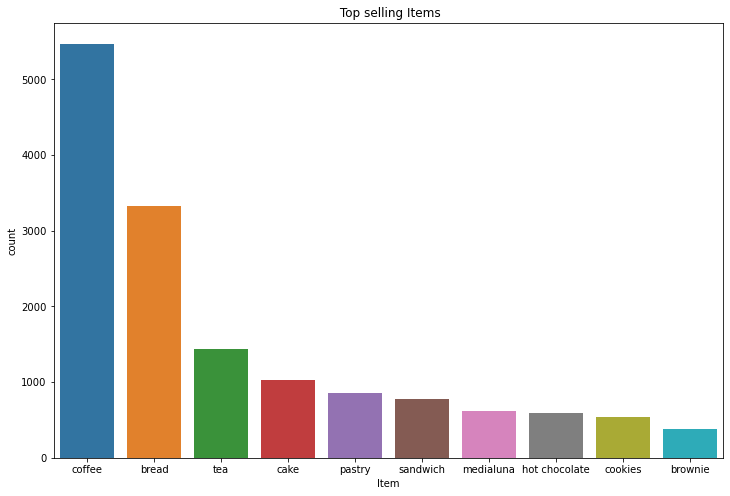

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x='Item',data=data,order=data.Item.value_counts().iloc[:10].index)
plt.title(" Top selling Items")
plt.show()

In [14]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [32]:
pd.set_option('display.max_rows',100)
a=data.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
a.sample(10)

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
5285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Above line of code is to transfrom the data to make items as columns and each transaction as a row and count same Items bought in one transaction but fill other cloumns of the row with 0 to represent item which are not bought.

In [16]:
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
a=a.applymap(encode)
a

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
freq_item=apriori(a,min_support=0.01,use_colnames=True)
freq_item.sort_values(by='support',ascending=False)

C:\Users\User\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(bread, coffee)"
19,0.086107,(pastry)
21,0.071844,(sandwich)
16,0.061807,(medialuna)
12,0.058320,(hot chocolate)
42,0.054728,"(cake, coffee)"


In [18]:
rules=association_rules(freq_item,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(coffee),(alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
2,(bread),(pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
3,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
4,(coffee),(brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
5,(brownie),(coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
8,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
9,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910


To explain how to draw inference explore the first rule we can see that toast and coffee are commonly bought together. This makes sense since people who purchase toast would like to have coffee with it.

- The __support value__ for the this rule is __0.023666__. This number is calculated by dividing the number of transactions containing toast divided by total number of transactions. 
- The __confidence level__ for the rule is __0.704403__ which shows that out of all the transactions that contain toast , 70.44% of the transactions also contain coffee. 
- Finally, the __lift__ of __1.47__ tells us that coffee is 1.47 times more likely to be bought by the customers who buy toast compared to the default likelihood of the sale of coffee.

In [19]:
rules.sort_values('confidence', ascending  =  False, inplace  =  True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [20]:
rules = rules[rules['confidence']>= 0.55]
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682


__How do we interpret these rules?__

- __55%__ of the customers who bought a __pastry__ also bought a _coffee_.

- __60%__ of the customers who bought a __spanish__ brunch also bought a _coffee_.

- __70%__ of the customers who bought a __toast__ also bought a _coffee_.

And so on.

In [21]:
# pip install network


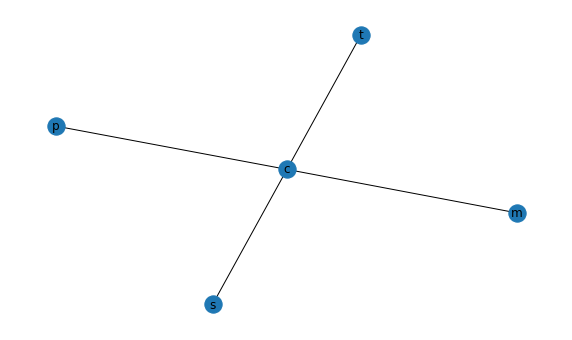

In [31]:
import networkx as nx
rules.antecedents=rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents=rules.consequents.apply(lambda x: next(iter(x)))
fig,ax=plt.subplots(figsize=(10,6))
ga=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(ga,with_labels=True)


## Conclusion
- Coffee is the bestseller of this bakery and it shows association with 4 items- __pastry, toast, medialuna and spanish brunch__. There are a couple of strategies that the bakery can adopt to increase its sales considering the association we have seen between coffee and its 4 partners.
<br/>
